<a href="https://colab.research.google.com/github/sumit1311singh/Multiclass_Classification_with_the_E.coli_Dataset/blob/main/Multiclass_Classification_with_the_E_coli_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from pandas import set_option
from collections import Counter
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

In [ ]:
filename = '/content/ecoli.csv'

df = read_csv(filename, header=None)

print(df.shape)

target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 50
    print('Class=%s, Count=%d, Percentage=%.5f%%' % (k, v, per))

set_option('precision', 5)
print(df.describe())

(336, 8)
Class=cp, Count=143, Percentage=21.27976%
Class=im, Count=77, Percentage=11.45833%
Class=imS, Count=2, Percentage=0.29762%
Class=imL, Count=2, Percentage=0.29762%
Class=imU, Count=35, Percentage=5.20833%
Class=om, Count=20, Percentage=2.97619%
Class=omL, Count=5, Percentage=0.74405%
Class=pp, Count=52, Percentage=7.73810%
               0          1          2  ...          4          5          6
count  336.00000  336.00000  336.00000  ...  336.00000  336.00000  336.00000
mean     0.50006    0.50000    0.49548  ...    0.50003    0.50018    0.49973
std      0.19463    0.14816    0.08850  ...    0.12238    0.21575    0.20941
min      0.00000    0.16000    0.48000  ...    0.00000    0.03000    0.00000
25%      0.34000    0.40000    0.48000  ...    0.42000    0.33000    0.35000
50%      0.50000    0.47000    0.48000  ...    0.49500    0.45500    0.43000
75%      0.66250    0.57000    0.48000  ...    0.57000    0.71000    0.71000
max      0.89000    1.00000    1.00000  ...    0.88

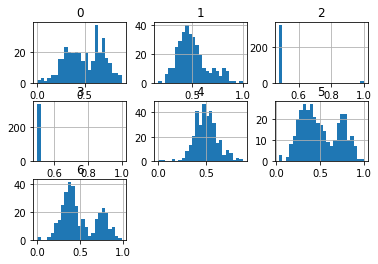

In [ ]:
df.hist(bins=25)
pyplot.show()

In [ ]:
def new_data(filename):
  df = read_csv(filename, header=None)
  df = df[df[7] != 'imS']
  df = df[df[7] != 'imL']
  data = df.values
  X, y = data[:, :-1], data[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

In [ ]:
def evaluate_model(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
 

def get_models():
  models, names = list(), list()
 
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  
  models.append(LinearSVC())
  names.append('SVM')
  
  models.append(BaggingClassifier(n_estimators=1000))
  names.append('BAG')
  
  models.append(RandomForestClassifier(n_estimators=1000))
  names.append('RF')
  
  models.append(ExtraTreesClassifier(n_estimators=1000))
  names.append('ET')
  return models, names

In [ ]:
X, y = load_dataset(full_path)

models, names = get_models()
results = list()

for i in range(len(models)):
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
 
def new_data(filename):
  df = read_csv(filename, header=None)
  df = df[df[7] != 'imS']
  df = df[df[7] != 'imL']
  data = df.values
  X, y = data[:, :-1], data[:, -1]
  le = LabelEncoder()
  y = le.fit_transform(y)
  return X, y, le
 

filename = '/home/sumit/ecoli.csv'

X, y, le = new_data(filename)

model = RandomForestClassifier(n_estimators=1000)

model.fit(X, y)

# known class "om"
row = [0.78,0.68,0.48,0.50,0.83,0.40,0.29]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected om)' % (l))

# known class "cp"
row = [0.49,0.29,0.48,0.50,0.56,0.24,0.35]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected cp)' % (l))

# known class "pp"
row = [0.74,0.49,0.48,0.50,0.42,0.54,0.36]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected pp)' % (l))

# known class "imU"
row = [0.72,0.42,0.48,0.50,0.65,0.77,0.79]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected imU)' % (l))

# known class "omL"
row = [0.77,0.57,1.00,0.50,0.37,0.54,0.0]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected omL)' % (l))

# known class "im"
row = [0.06,0.61,0.48,0.50,0.49,0.92,0.37]
q = model.predict([row])
l = le.inverse_transform(q)[0]
print('>Predicted=%s (expected im)' % (l))